## World Happiness Report 2023 - EDA

In this project, an analysis of the World Happiness Report 2023 dataset was conducted, exploring the relationships between happiness scores, regional trends, and key indicators such as GDP per capita, social support, healthy life expectancy, freedom to make life choices, generosity, and perceptions of corruption.

The dataset was downloaded from the World Happiness Report website, which provides open access to the data and tools for analysis. By examining these relationships, insights were gained into the complex and multifaceted nature of happiness and well-being, and potential strategies for promoting happiness and improving quality of life around the world were identified. Finally, the happiness scores of all the countries around the world were presented on a map with a timeline from 2005 to 2022.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

**World Happiness Report 2023 Dataset**

In [2]:
WHR_df = pd.read_csv("world Happiness Report 2023.csv")
WHR_df.head(4)

,Country name,iso alpha,Regional indicator,Happiness score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,...,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Afghanistan,AFG,South Asia,1.859,0.033,1.923,1.795,7.324,0.341,54.712,...,-0.081,0.847,1.778,0.645,0.000,0.087,0.000,0.093,0.059,0.976
1,Albania,ALB,Central and Eastern Europe,5.277,0.066,5.406,5.148,9.567,0.718,69.150,...,-0.007,0.878,1.778,1.449,0.951,0.480,0.549,0.133,0.037,1.678
2,Algeria,DZA,Middle East and North Africa,5.329,0.062,5.451,5.207,9.300,0.855,66.549,...,-0.117,0.717,1.778,1.353,1.298,0.409,0.252,0.073,0.152,1.791
3,Argentina,ARG,Latin America and Caribbean,6.024,0.063,6.147,5.900,9.959,0.891,67.200,...,-0.089,0.814,1.778,1.590,1.388,0.427,0.587,0.088,0.082,1.861


**Filter the columns and copy only the ones that will be used for analysis.**

In [3]:
columns = ['Country name', 'iso alpha', 'Regional indicator', 'Happiness score', 
           'Logged GDP per capita', 'Social support',
           'Healthy life expectancy', 'Freedom to make life choices',
           'Generosity', 'Perceptions of corruption']
happy_df = WHR_df[columns].copy()
happy_df.head()

,Country name,iso alpha,Regional indicator,Happiness score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Afghanistan,AFG,South Asia,1.859,7.324,0.341,54.712,0.382,-0.081,0.847
1,Albania,ALB,Central and Eastern Europe,5.277,9.567,0.718,69.150,0.794,-0.007,0.878
2,Algeria,DZA,Middle East and North Africa,5.329,9.300,0.855,66.549,0.571,-0.117,0.717
3,Argentina,ARG,Latin America and Caribbean,6.024,9.959,0.891,67.200,0.823,-0.089,0.814
4,Armenia,ARM,Commonwealth of Independent States,5.342,9.615,0.790,67.789,0.796,-0.155,0.705


**Convert all column names to uppercase**

In [4]:
happy_df.columns = happy_df.columns.str.upper()
happy_df.head()

,COUNTRY NAME,ISO ALPHA,REGIONAL INDICATOR,HAPPINESS SCORE,LOGGED GDP PER CAPITA,SOCIAL SUPPORT,HEALTHY LIFE EXPECTANCY,FREEDOM TO MAKE LIFE CHOICES,GENEROSITY,PERCEPTIONS OF CORRUPTION
0,Afghanistan,AFG,South Asia,1.859,7.324,0.341,54.712,0.382,-0.081,0.847
1,Albania,ALB,Central and Eastern Europe,5.277,9.567,0.718,69.150,0.794,-0.007,0.878
2,Algeria,DZA,Middle East and North Africa,5.329,9.300,0.855,66.549,0.571,-0.117,0.717
3,Argentina,ARG,Latin America and Caribbean,6.024,9.959,0.891,67.200,0.823,-0.089,0.814
4,Armenia,ARM,Commonwealth of Independent States,5.342,9.615,0.790,67.789,0.796,-0.155,0.705


## Data info

In [5]:
happy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   COUNTRY NAME                  137 non-null    object 
 1   ISO ALPHA                     137 non-null    object 
 2   REGIONAL INDICATOR            137 non-null    object 
 3   HAPPINESS SCORE               137 non-null    float64
 4   LOGGED GDP PER CAPITA         137 non-null    float64
 5   SOCIAL SUPPORT                137 non-null    float64
 6   HEALTHY LIFE EXPECTANCY       136 non-null    float64
 7   FREEDOM TO MAKE LIFE CHOICES  137 non-null    float64
 8   GENEROSITY                    137 non-null    float64
 9   PERCEPTIONS OF CORRUPTION     137 non-null    float64
dtypes: float64(7), object(3)
memory usage: 10.8+ KB


In [6]:
# Check if there are any missing values
happy_df.isnull().sum()

COUNTRY NAME                    0
ISO ALPHA                       0
REGIONAL INDICATOR              0
HAPPINESS SCORE                 0
LOGGED GDP PER CAPITA           0
SOCIAL SUPPORT                  0
HEALTHY LIFE EXPECTANCY         1
FREEDOM TO MAKE LIFE CHOICES    0
GENEROSITY                      0
PERCEPTIONS OF CORRUPTION       0
dtype: int64

In [7]:
happy_df[happy_df.isnull().any(axis = 1)]

,COUNTRY NAME,ISO ALPHA,REGIONAL INDICATOR,HAPPINESS SCORE,LOGGED GDP PER CAPITA,SOCIAL SUPPORT,HEALTHY LIFE EXPECTANCY,FREEDOM TO MAKE LIFE CHOICES,GENEROSITY,PERCEPTIONS OF CORRUPTION
116,State of Palestine,PSE,Middle East and North Africa,4.908,8.716,0.859,NaN,0.694,-0.132,0.836


A missing value has been found in the "healthy life expectancy" column for the State of Palestine. It has been decided not to make any assumptions or fill in the missing value, as this could bias the information. Since the value is not provided in the report, it will be left as is. This decision will not impact the analysis, and the missing value has been noted for future reference.

In [8]:
# Choose the Numerical columns for further analysis
numerical_columns = ['HAPPINESS SCORE', 'LOGGED GDP PER CAPITA', 'SOCIAL SUPPORT',
                     'HEALTHY LIFE EXPECTANCY','FREEDOM TO MAKE LIFE CHOICES',
                     'GENEROSITY', 'PERCEPTIONS OF CORRUPTION']
happy_df[numerical_columns].describe()

,HAPPINESS SCORE,LOGGED GDP PER CAPITA,SOCIAL SUPPORT,HEALTHY LIFE EXPECTANCY,FREEDOM TO MAKE LIFE CHOICES,GENEROSITY,PERCEPTIONS OF CORRUPTION
count,137.000000,137.000000,137.000000,136.000000,137.000000,137.000000,137.000000
mean,5.539796,9.449796,0.799073,64.967632,0.787394,0.022431,0.725401
std,1.139929,1.207302,0.129222,5.750390,0.112371,0.141707,0.176956
min,1.859000,5.527000,0.341000,51.530000,0.382000,-0.254000,0.146000
25%,4.724000,8.591000,0.722000,60.648500,0.724000,-0.074000,0.668000
50%,5.684000,9.567000,0.827000,65.837500,0.801000,0.001000,0.774000
75%,6.334000,10.540000,0.896000,69.412500,0.874000,0.117000,0.846000
max,7.804000,11.660000,0.983000,77.280000,0.961000,0.531000,0.929000


## The distribution of numerical data using both histograms and boxplots...

In [9]:
# Create a function that displays the distribution of numerical
# data using both histograms and boxplots.
def show_distribution(var):
    var_min = happy_df[var].min()
    var_mean = happy_df[var].mean()
    var_median = happy_df[var].median()
    var_mode = happy_df[var].mode()[0]
    var_max = happy_df[var].max()
    
    # Histogram 
    fig, ax = plt.subplots(2, 1, figsize = (8,8))
    sns.histplot(happy_df, x = var, kde = True, color = 'red', 
                 alpha = 0.2, ax = ax[0])
    ax[0].set_ylabel("Frequency")
    
    ax[0].axvline(x = var_min, color = 'gray', linewidth = 2, linestyle = "--")
    ax[0].axvline(x = var_mean, color = 'blue', linewidth = 2, linestyle = "--")
    ax[0].axvline(x = var_median, color = 'brown', linewidth = 2, linestyle = "--")
    ax[0].axvline(x = var_mode, color = 'cyan', linewidth = 2, linestyle = "--")
    ax[0].axvline(x = var_max, color = 'gray', linewidth = 2, linestyle = "--")
    
    # Box plot
    sns.boxplot(happy_df, x = var, width = 0.3, ax = ax[1],)
    ax[1].set_xlabel("Value")
    
    fig.suptitle("Data Distribution - " + var, size = 15)
    fig.show()

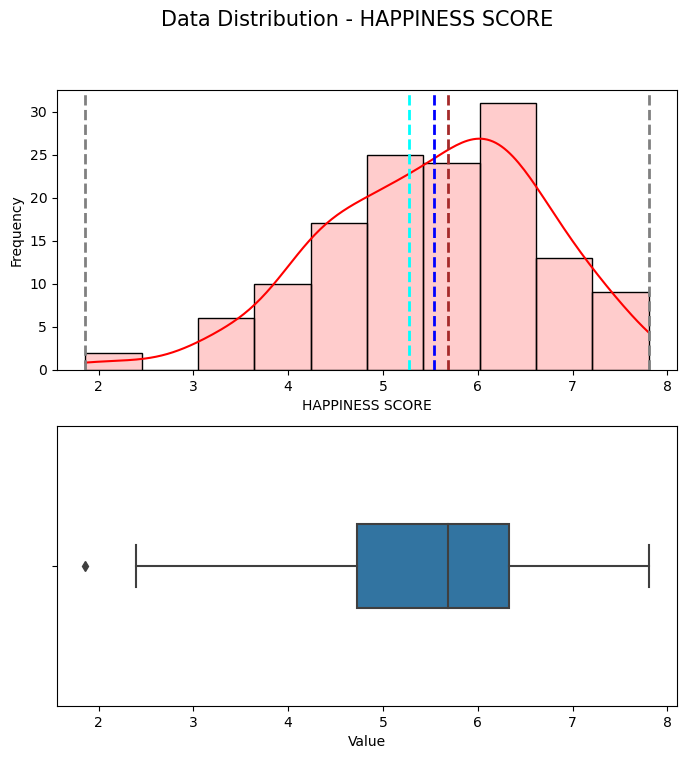

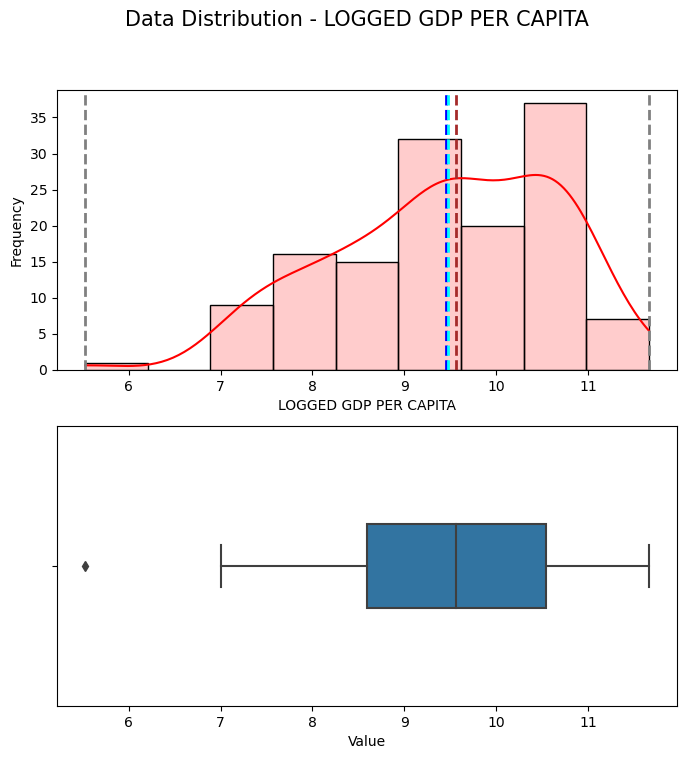

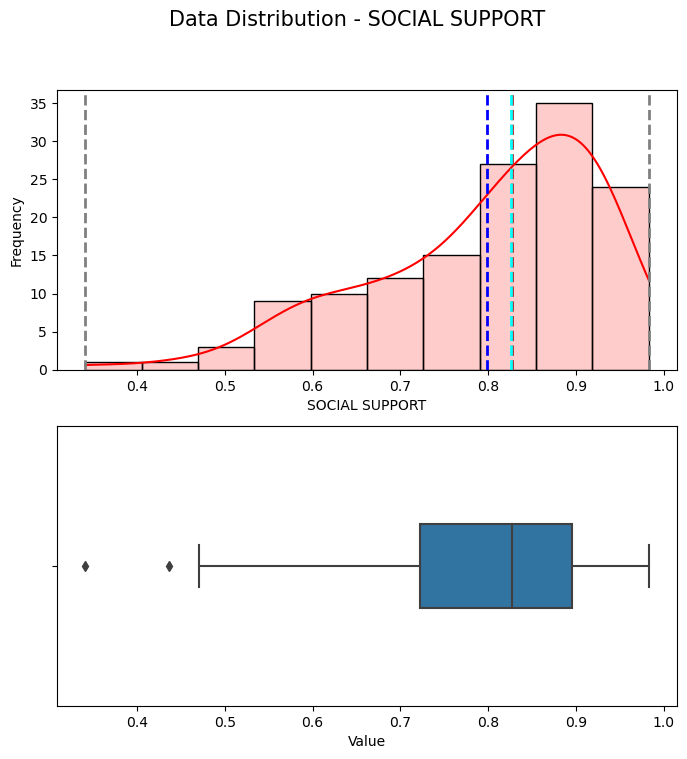

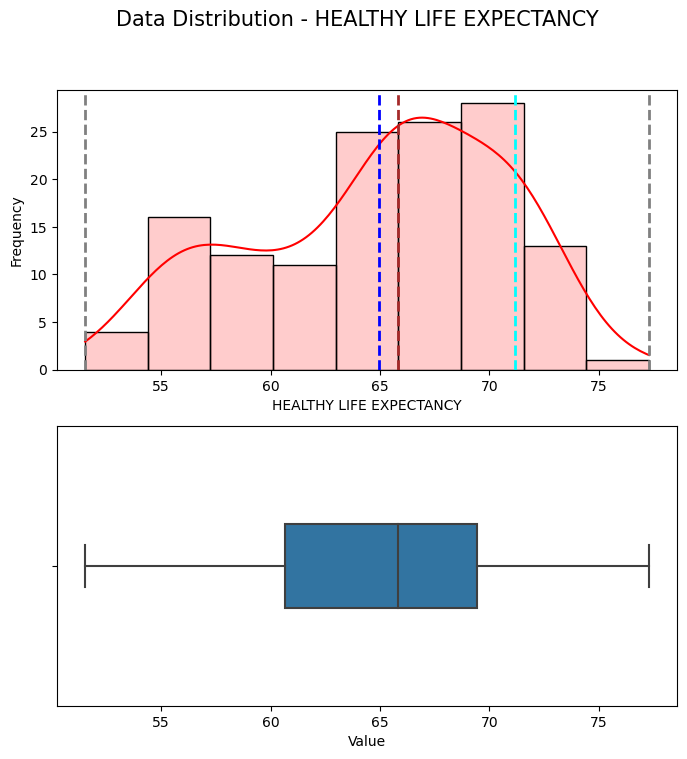

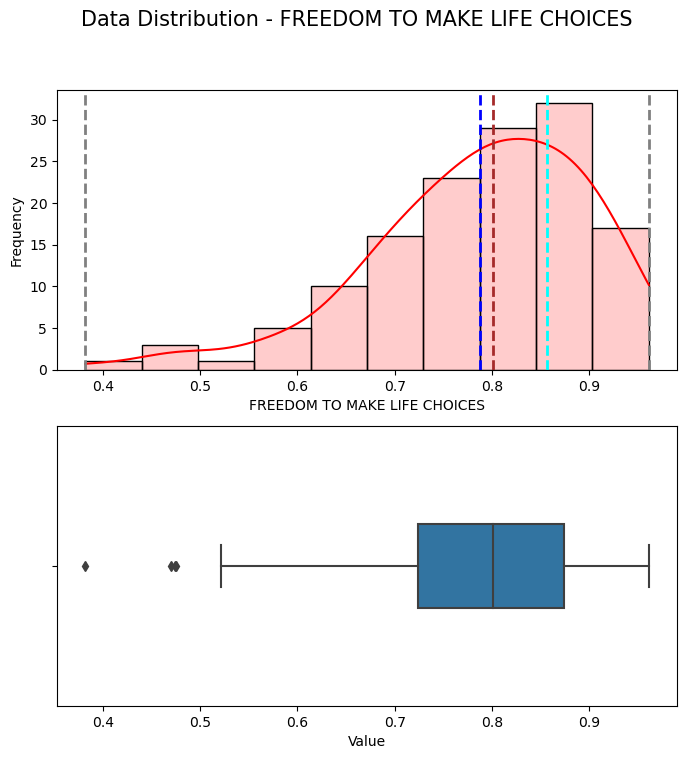

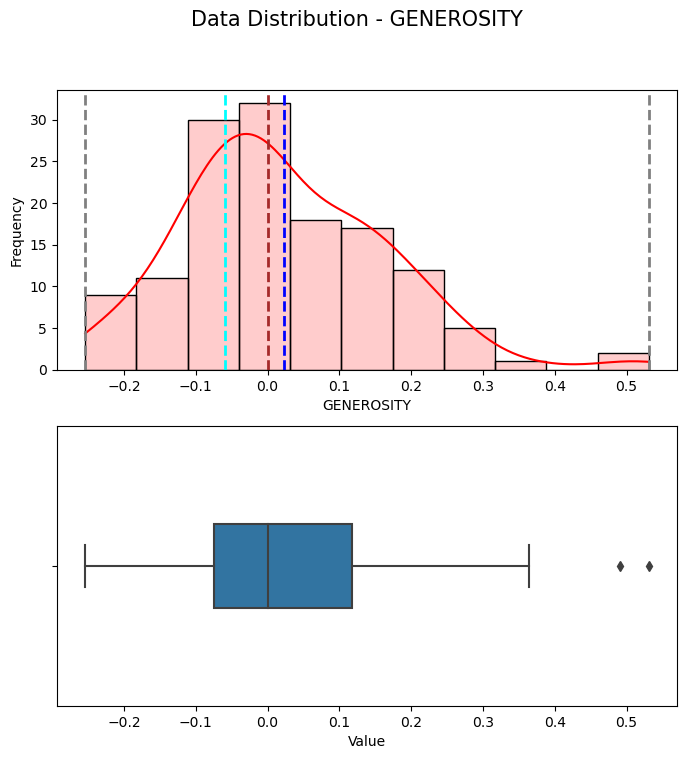

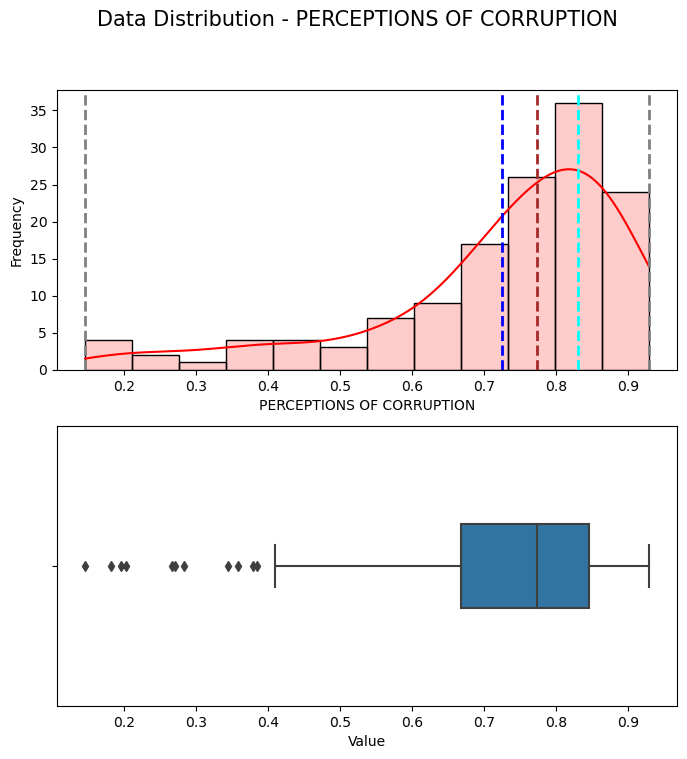

In [10]:
# Call show_distribution function
for column in numerical_columns:
    show_distribution(column)

Outliers, which are data points that significantly differ from other observations, have been found in the distribution of "perceptions of corruption." However, it has been decided to include these outliers in the analysis. They might indicate the presence of exceptional or unusual situations in the country.

### A scatter plot has been created to further explore the distribution of the factors, depicting the relationship between the happiness score and other factors.

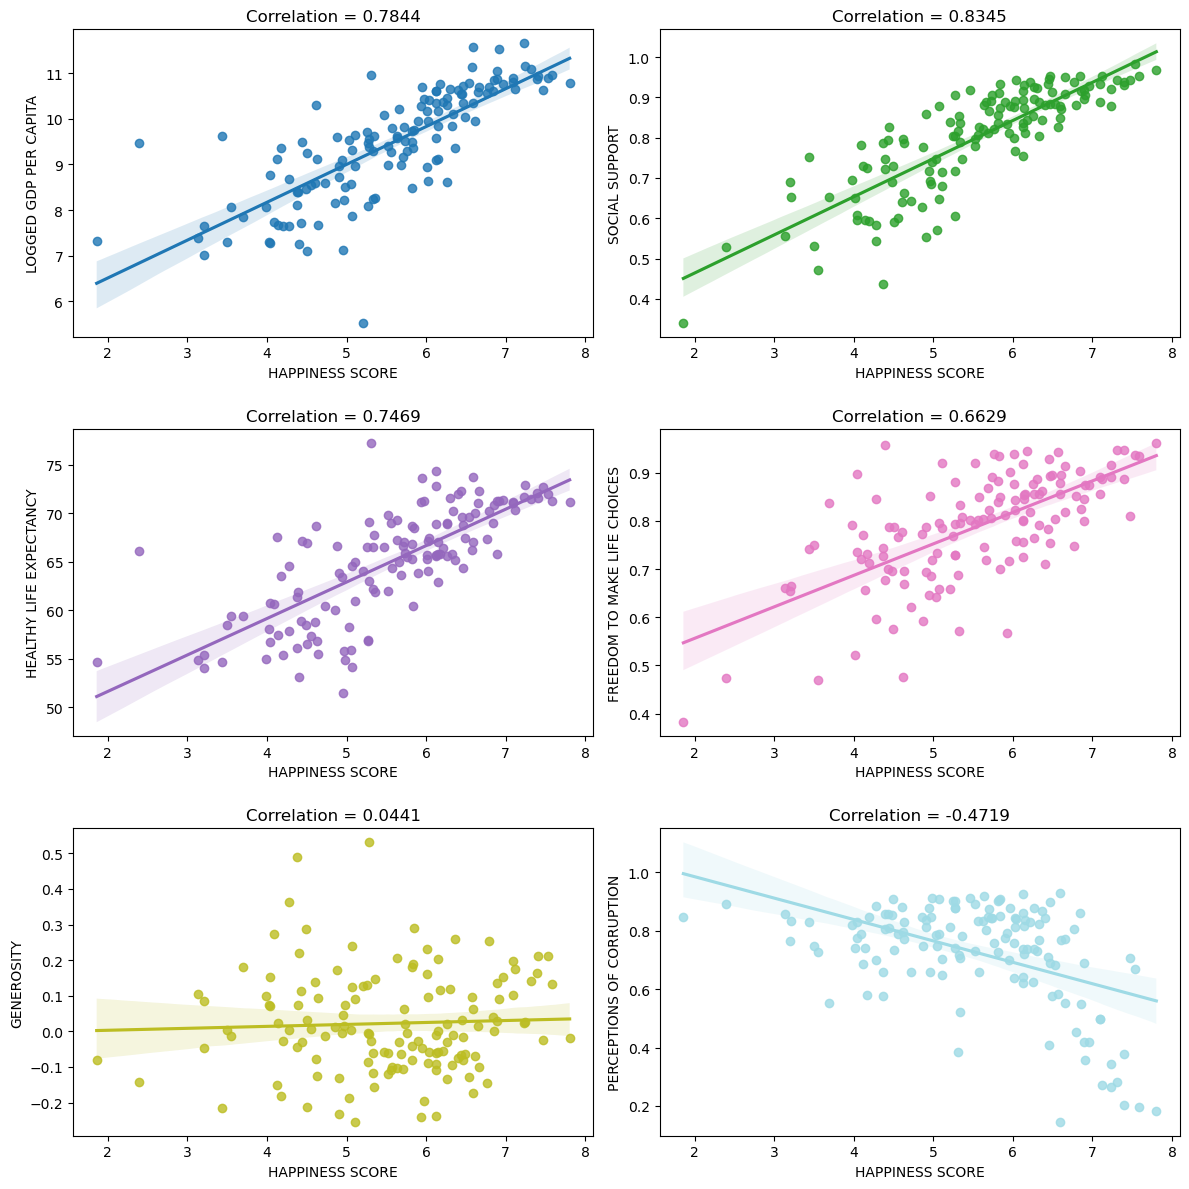

In [11]:
#Happiness score vs other factors
tab_20_colors = ["#1f77b4", "#2ca02c", "#9467bd", "#e377c2", "#bcbd22", "#9edae5"]
fig, ax = plt.subplots(3, 2, figsize = (12,12))
i = 0
for j, column in enumerate(numerical_columns[1:]):
    corr = happy_df['HAPPINESS SCORE'].corr(happy_df[column])
    sns.regplot(happy_df, x = "HAPPINESS SCORE", y = column,
                color = tab_20_colors[i], ax = ax[j//2, j%2])
    ax[j//2, j%2].set_title("Correlation = {:.4f}".format(corr))
    i += 1 
fig.tight_layout()
fig.subplots_adjust(hspace = 0.3)
fig.show()

**Analysis of happiness score and other factors across different region..**

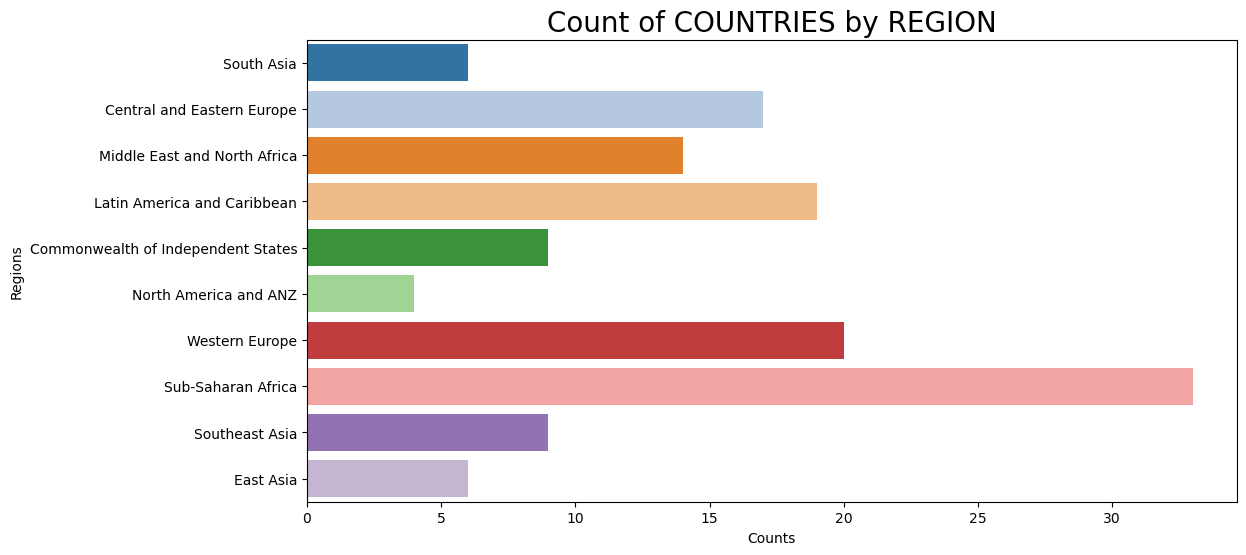

In [12]:
#Count of Countries by Region
fig = plt.figure(figsize = (12,6))
sns.countplot(happy_df, y = 'REGIONAL INDICATOR', palette = 'tab20')
plt.ylabel("Regions")
plt.xlabel("Counts")
plt.title("Count of COUNTRIES by REGION", size = 20)
plt.show()

Text(0.5, 1.0, 'HAPPINESS SCORE by REGION')

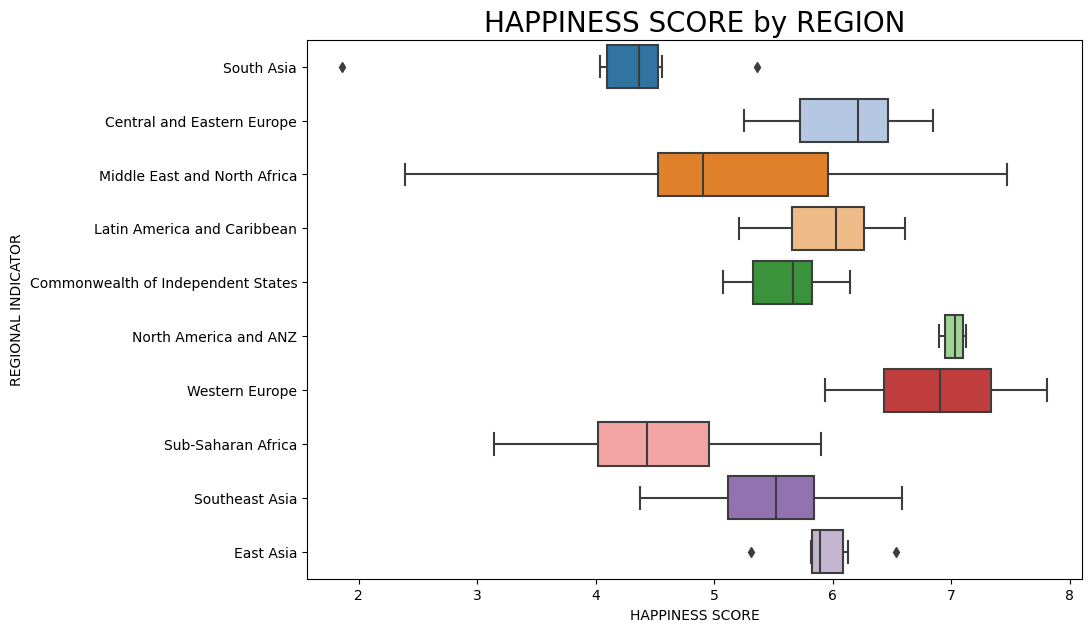

In [13]:
#Boxplot
fig = plt.figure(figsize = (10,7))
sns.boxplot(happy_df, y = 'REGIONAL INDICATOR', x = "HAPPINESS SCORE",
            palette = 'tab20')
plt.title("HAPPINESS SCORE by REGION", size = 20)

-The box plot analysis indicates that higher median happiness scores are observed in the Western Europe, North America, and ANZ regions compared to other regions.

-An outlier is observed in the South Asia region, where Afghanistan has a notably lower happiness score. This may be attributed to political instability and a lower healthy life expectancy in Afghanistan.

### An analysis was conducted to further explore the factors that may contribute to higher or lower happiness scores across different regions. A bar chart was created to depict (represent ) the average values of various factors, such as GDP per capita, social support, healthy life expectancy, etc., across different regions.

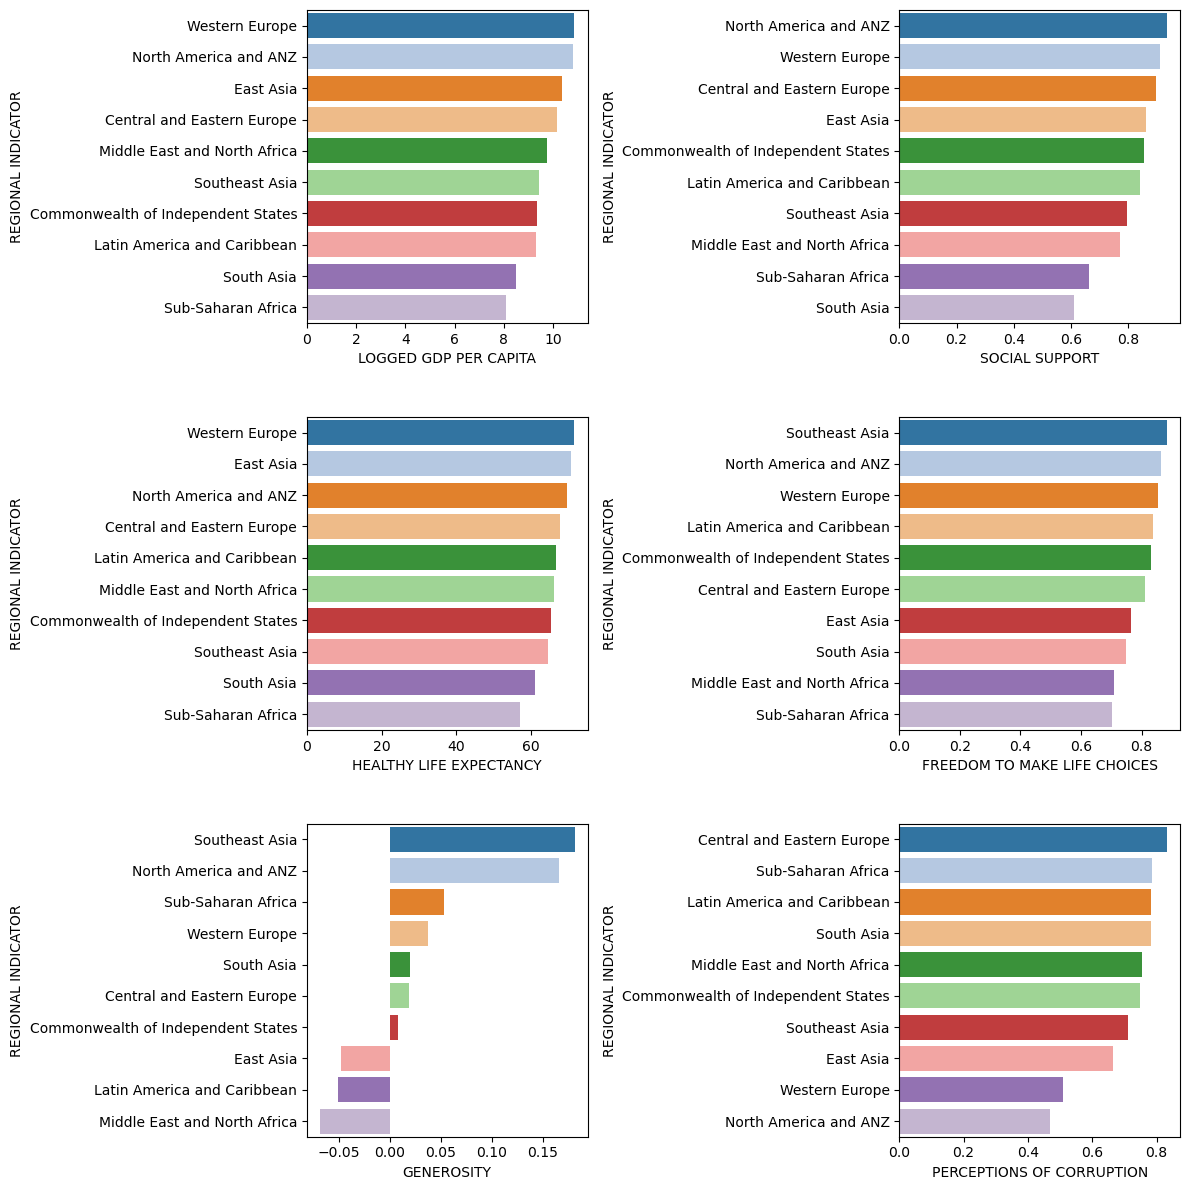

In [14]:
region_wise = happy_df.groupby("REGIONAL INDICATOR")[numerical_columns].mean().reset_index()
fig, ax = plt.subplots(3, 2, figsize = (12,12))
for i, column in enumerate(numerical_columns[1:]):
    region_wise.sort_values(column, ascending = False, inplace = True)
    sns.barplot(region_wise, x = column, y = 'REGIONAL INDICATOR', palette = 'tab20', ax = ax[i//2, i%2])
fig.tight_layout()
fig.subplots_adjust(hspace = 0.3)
fig.show()

-It is suggested by this analysis that regions with higher median happiness scores, such as Western Europe, North America, and ANZ, tend to have higher average values in various key factors, including GDP per capita, social support, healthy life expectancy, and freedom to make life choices, compared to regions with lower median happiness scores.

-Moreover, these regions exhibit lower average values in factors that are negatively associated with happiness levels, such as perceptions of corruption.

-These findings underscore the significance of economic prosperity, social support networks, access to healthcare, and freedom to make life choices in promoting happiness and well-being across different regions.

**Top 15 happiest and least happy countries.**

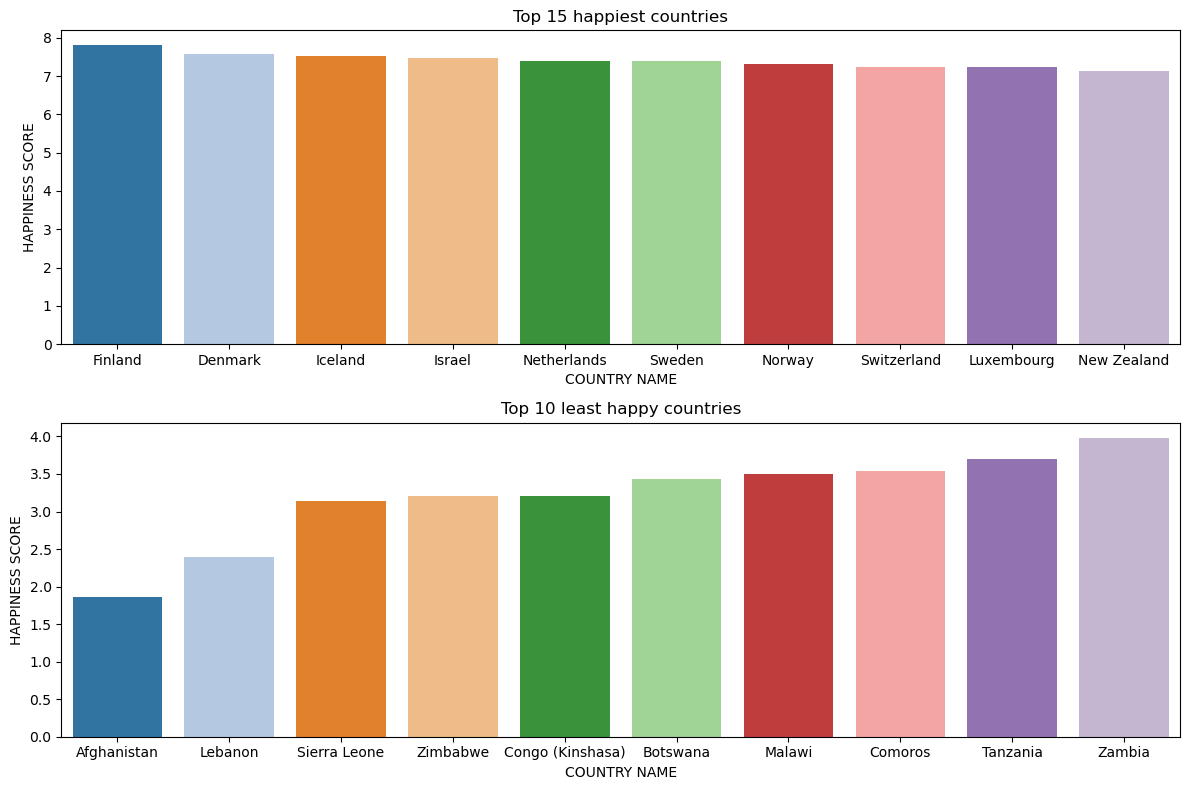

In [15]:
#A column chart was created to analyze the top 10 happiest and least happy countries.
top_10_happy_country = happy_df.sort_values('HAPPINESS SCORE', ascending = False)
bottom_10_happy_country = happy_df.sort_values('HAPPINESS SCORE', ascending = True)

fig, ax = plt.subplots(2, 1, figsize = (12,8))

sns.barplot(top_10_happy_country.iloc[:10], y = 'HAPPINESS SCORE',
            x = 'COUNTRY NAME', palette = 'tab20', ax = ax[0])
ax[0].set_title("Top 15 happiest countries")



sns.barplot(bottom_10_happy_country.iloc[:10], y = 'HAPPINESS SCORE',
            x = 'COUNTRY NAME', palette = 'tab20', ax = ax[1])
ax[1].set_title("Top 10 least happy countries")

fig.tight_layout()
fig.show()

-The analysis revealed that eight out of the top 10 happiest countries are from the Western Europe region.

-Similarly, the analysis of the top 10 least happy countries showed that eight out of 10 countries are from the Sub-Saharan Africa region.

**CONCLUSION**

This project has thoroughly examined happiness scores worldwide, showing how economic, social, and health factors influence people's well-being. The results indicate that boosting economic growth, building strong social networks, and improving healthcare access can increase happiness levels. Also, reducing corruption can help maintain these improvements. By making happiness a priority for individuals, communities, and policymakers, we can strive to create a fairer, more equal, and more satisfying world for everyone.